In [62]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, preprocessing
import xgboost as xgb
color = sns.color_palette()

%matplotlib inline


In [63]:
train_df = pd.read_csv('../input/train.csv',index_col = 0)

In [64]:
train_df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,,,,,,,,,,,
1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [65]:
len(train_df['Product_ID'].value_counts())

3631

In [66]:
train_df.shape

(550068, 11)

In [67]:
train_df.describe()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [68]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Product_Category_3,383247,0.696727
Product_Category_2,173638,0.315666
Purchase,0,0.000000
Product_Category_1,0,0.000000
Marital_Status,0,0.000000
Stay_In_Current_City_Years,0,0.000000
City_Category,0,0.000000
Occupation,0,0.000000
Age,0,0.000000
Gender,0,0.000000


In [69]:
# looks like Product id is better to be in index 
train_df = pd.read_csv('../input/train.csv', index_col=[0,1])
train_df.head()

Gender   Age  Occupation City_Category  \
User_ID Product_ID                                          
1000001 P00069042       F  0-17          10             A   
        P00248942       F  0-17          10             A   
        P00087842       F  0-17          10             A   
        P00085442       F  0-17          10             A   
1000002 P00285442       M   55+          16             C   

                   Stay_In_Current_City_Years  Marital_Status  \
User_ID Product_ID                                              
1000001 P00069042                           2               0   
        P00248942                           2               0   
        P00087842                           2               0   
        P00085442                           2               0   
1000002 P00285442                          4+               0   

                    Product_Category_1  Product_Category_2  \
User_ID Product_ID                                           
1000001 P00069042                    3                 NaN   
        P00248942                    1                 6.0   
        P00087842                   12                 NaN   
        P00085442                   12                14.0   
1000002 P00285442                    8                 NaN   

                    Product_Category_3  Purchase  
User_ID Product_ID                                
1000001 P00069042                  NaN      8370  
        P00248942                 14.0     15200  
        P00087842                  NaN      1422  
        P00085442                  NaN      1057  
1000002 P00285442                  NaN      7969

In [70]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 550068 entries, (1000001, P00069042) to (1006039, P00371644)
Data columns (total 10 columns):
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(4), object(4)
memory usage: 44.1+ MB


In [71]:
train_df.groupby('Gender')['Purchase'].aggregate(np.max).reset_index().sort_values(by = 'Purchase', ascending= False)

,Gender,Purchase
1,M,23961
0,F,23959


In [74]:
train_df.groupby(['Gender','Marital_Status'])['Purchase'].aggregate(np.max).reset_index().sort_values(by = 'Purchase', ascending= False)

,Gender,Marital_Status,Purchase
2,M,0,23961
3,M,1,23961
1,F,1,23959
0,F,0,23955


Skew is: 0.6001400037087128


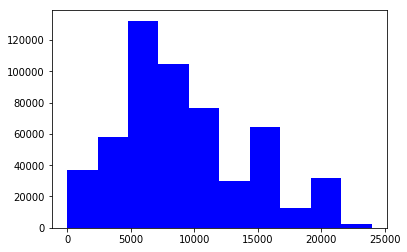

In [82]:
# measure of the shape of the distribution value
print ("Skew is:", train_df['Purchase'].skew())
plt.hist(train_df['Purchase'], color='blue')
plt.show()

c:\miniconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


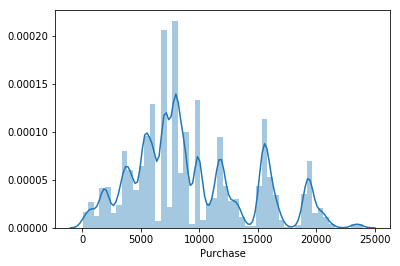

In [83]:
# Histogram
sns.distplot((train_df['Purchase']));

In [77]:
numeric_features = train_df.select_dtypes(include=[np.number])
numeric_features.dtypes

corr = numeric_features.corr()

print (corr['Purchase'].sort_values(ascending=False)[:5], '\n')
print (corr['Purchase'].sort_values(ascending=False)[-5:])

Purchase              1.000000
Occupation            0.020833
Marital_Status       -0.000463
Product_Category_3   -0.022006
Product_Category_2   -0.209918
Name: Purchase, dtype: float64 

Occupation            0.020833
Marital_Status       -0.000463
Product_Category_3   -0.022006
Product_Category_2   -0.209918
Product_Category_1   -0.343703
Name: Purchase, dtype: float64


In [78]:
corr_val = train_df.corr()['Purchase']
high_corr_col = corr_val[np.abs(corr_val) >0.01].index
high_corr_col

Index(['Occupation', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3', 'Purchase'],
      dtype='object')

In [80]:
new_train_df = train_df[list(high_corr_col)+['Occupation']]
new_train_df.head()

Occupation  Product_Category_1  Product_Category_2  \
User_ID Product_ID                                                       
1000001 P00069042           10                   3                 NaN   
        P00248942           10                   1                 6.0   
        P00087842           10                  12                 NaN   
        P00085442           10                  12                14.0   
1000002 P00285442           16                   8                 NaN   

                    Product_Category_3  Purchase  Occupation  
User_ID Product_ID                                            
1000001 P00069042                  NaN      8370          10  
        P00248942                 14.0     15200          10  
        P00087842                  NaN      1422          10  
        P00085442                  NaN      1057          10  
1000002 P00285442                  NaN      7969          16

ValueError: could not broadcast input array from shape (550068,2) into shape (550068)

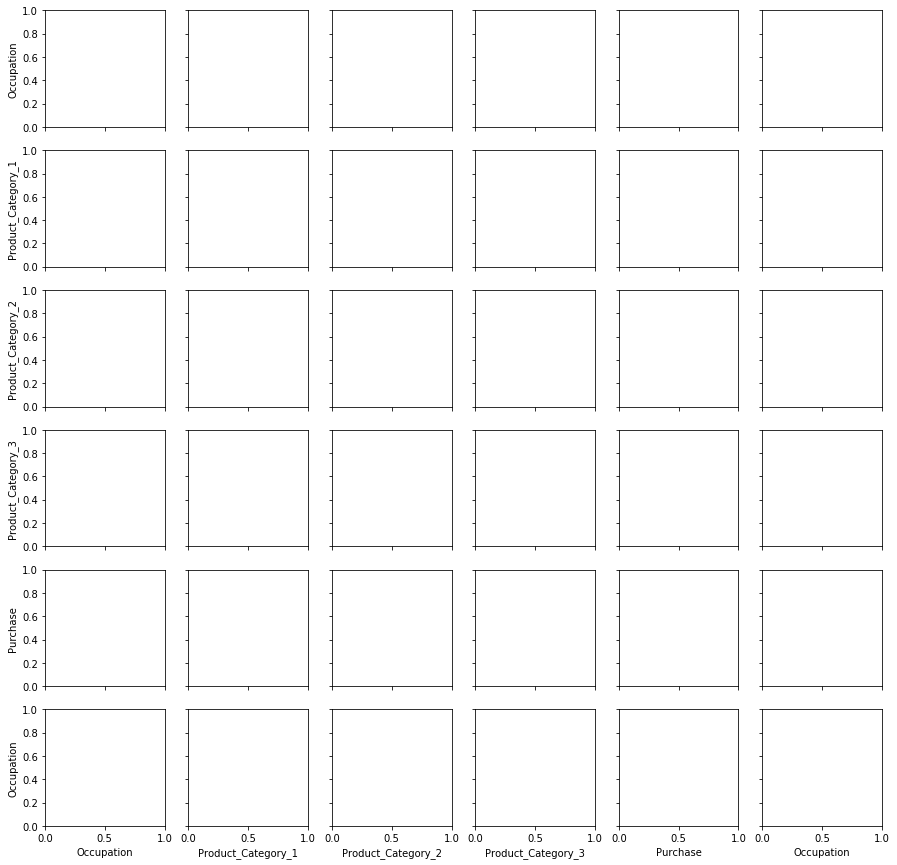

In [81]:
# hi
g = sns.PairGrid(new_train_df, hue="Occupation")
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

Numeric features

In [86]:
numeric_features = train_df.select_dtypes(include=[np.number])
numeric_features.dtypes

Occupation              int64
Marital_Status          int64
Product_Category_1      int64
Product_Category_2    float64
Product_Category_3    float64
Purchase                int64
dtype: object

In [87]:
corr = numeric_features.corr()

print (corr['Purchase'].sort_values(ascending=False)[:5], '\n')
print (corr['Purchase'].sort_values(ascending=False)[-5:])

Purchase              1.000000
Occupation            0.020833
Marital_Status       -0.000463
Product_Category_3   -0.022006
Product_Category_2   -0.209918
Name: Purchase, dtype: float64 

Occupation            0.020833
Marital_Status       -0.000463
Product_Category_3   -0.022006
Product_Category_2   -0.209918
Product_Category_1   -0.343703
Name: Purchase, dtype: float64


In [89]:
train_df.Occupation.unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [93]:
occup_pivot = train_df.pivot_table(index='Occupation',
                                  values='Purchase')#, aggfunc=np.median)
occup_pivot

,Purchase
Occupation,
0,9124.428588
1,8953.193270
2,8952.481683
3,9178.593088
4,9213.980251
5,9333.149298
6,9256.535691
7,9425.728223
8,9532.592497


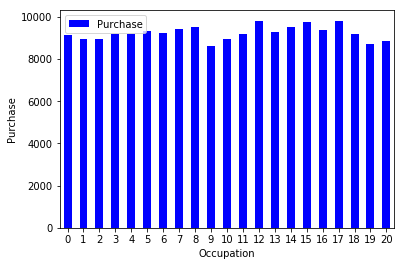

In [94]:
occup_pivot.plot(kind='bar', color='blue')
plt.xlabel('Occupation')
plt.ylabel('Purchase')
plt.xticks(rotation=0)
plt.show()

In [97]:
city_pivot = train_df.pivot_table(index='City_Category',
                                  values='Purchase')#, aggfunc=np.median)
city_pivot

,Purchase
City_Category,
A,8911.939216
B,9151.300563
C,9719.920993


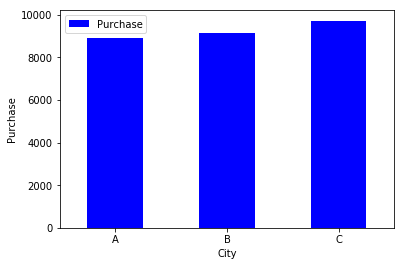

In [98]:
city_pivot.plot(kind='bar', color='blue')
plt.xlabel('City')
plt.ylabel('Purchase')
plt.xticks(rotation=0)
plt.show()

In [43]:

df_filled = train_df.fillna(0)

In [44]:
train_df = pd.get_dummies(df_filled)
train_df.columns

Index(['Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'Gender_F',
       'Gender_M', 'Age_0-17', 'Age_18-25', 'Age_26-35', 'Age_36-45',
       'Age_46-50', 'Age_51-55', 'Age_55+', 'City_Category_A',
       'City_Category_B', 'City_Category_C', 'Stay_In_Current_City_Years_0',
       'Stay_In_Current_City_Years_1', 'Stay_In_Current_City_Years_2',
       'Stay_In_Current_City_Years_3', 'Stay_In_Current_City_Years_4+'],
      dtype='object')

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test = train_test_split(train_df[train_df.columns.difference(['Purchase'])], train_df['Purchase'], test_size=0.25)

In [46]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=5, random_state=123)
regr.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=123, verbose=0, warm_start=False)

In [48]:
from sklearn.metrics import mean_squared_error
Y_pred = regr.predict(X_test)
mean_squared_error(Y_test, Y_pred)

10711642.143959418